In [ ]:
!apt-get install gcc-4.8 gcc-5 g++-4.8 g++-5
!apt-get install libblas-dev liblapack-dev
!apt-get install libopenblas-dev
!apt-get install gfortran-4.8
!apt-get install gfortran-5
!apt-get install scons
!apt-get install libpng-dev
!apt-get install libboost-all-dev freeglut3-dev
!apt-get install xvfb
!apt-get install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-4.8 cpp-5 gcc-4.8-base gcc-5-base libasan0 libasan2 libgcc-4.8-dev
  libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev libstdc++-5-dev
Suggested packages:
  gcc-4.8-locales gcc-5-locales g++-4.8-multilib gcc-4.8-doc
  libstdc++6-4.8-dbg g++-5-multilib gcc-5-doc libstdc++6-5-dbg
  gcc-4.8-multilib libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan0-dbg libtsan0-dbg libquadmath0-dbg gcc-5-multilib libasan2-dbg
  liblsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg libstdc++-4.8-doc
  libstdc++-5-doc
The following NEW packages will be installed:
  cpp-4.8 cpp-5 g++-4.8 g++-5 gcc-4.8 gcc-4.8-base gcc-5 gcc-5-base libasan0
  libasan2 libgcc-4.8-dev libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev
  libstdc++-5-dev
0 upgraded, 16 newly installed, 0 to remove and 39 not upgraded.
Need to get 58.3 MB of archives.
After this operati

In [ ]:
!pip install torch==1.3.0 rtree trimesh

     |████████████████████████████████| 773.1MB 16kB/s 
     |████████████████████████████████| 1.0MB 36.2MB/s 
     |████████████████████████████████| 634kB 40.7MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [ ]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-4.8 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-4.8 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20

update-alternatives: using /usr/bin/gcc-4.8 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-4.8 to provide /usr/bin/g++ (g++) in auto mode
update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/mszarski/diffsim.git

Cloning into 'diffsim'...
remote: Enumerating objects: 1202, done.
remote: Counting objects: 100% (1202/1202), done.
remote: Compressing objects: 100% (784/784), done.
remote: Total 1202 (delta 421), reused 1045 (delta 296), pack-reused 0
Receiving objects: 100% (1202/1202), 27.80 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (421/421), done.


In [ ]:
!chmod +x diffsim/arcsim/dependencies/taucs/configure

In [ ]:
%cd /content

/content


In [ ]:
%cd diffsim
!update-alternatives --set gcc "/usr/bin/gcc-4.8"
!update-alternatives --set g++ "/usr/bin/g++-4.8"
%cd arcsim/dependencies/
!make 
%cd ../..
!update-alternatives --set gcc "/usr/bin/gcc-5"
!update-alternatives --set g++ "/usr/bin/g++-5"
!make -j 8
%cd pysim
!ln -s ../arcsim/conf ./conf
!ln -s ../arcsim/materials ./materials
!ln -s ../arcsim/meshes ./meshes


    ^
In file included from arcsim/src/util.hpp:31:0,
                 from arcsim/src/util.cpp:27:
arcsim/src/mesh.hpp: In constructor ‘Edge::Edge(Node*, Node*, at::Tensor, int)’:
arcsim/src/mesh.hpp:109:12: warning: ‘Edge::reference_angle’ will be initialized after [-Wreorder]
     Tensor reference_angle; // just to get sign of dihedral_angle() right
            ^
arcsim/src/mesh.hpp:106:12: warning:   ‘at::Tensor Edge::l’ [-Wreorder]
     Tensor l, ldaa, bias_angle; // length
            ^
arcsim/src/mesh.hpp:112:14: warning:   when initialized here [-Wreorder]
     explicit Edge (Node *node0, Node *node1, Tensor theta_ideal, int label=0):
              ^
arcsim/src/mesh.hpp: In constructor ‘Edge::Edge(Node*, Node*, int)’:
arcsim/src/mesh.hpp:109:12: warning: ‘Edge::reference_angle’ will be initialized after [-Wreorder]
     Tensor reference_angle; // just to get sign of dihedral_angle() right
            ^
arcsim/src/mesh.hpp:106:12: warning:   ‘at::Tensor Edge::l’ [-Wreorder]
    

In [ ]:
##restart runtime here

In [ ]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [ ]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/draping_workspace'       # path to your project on Drive

drive.mount(ROOT)

Mounted at /content/drive


In [ ]:
%%writefile conf/draping.json
{
    "frame_time": 0.125,
    "frame_steps": 1,
    "end_time": 10,
    "cloths": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_99pc.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,0.3]},
        "materials": [{"data": "materials/gray-interlock.json",
                       "thicken": 2}],
        "remeshing": {
            "refine_angle": 0.3,
            "refine_compression": 0.005,
            "refine_velocity": 0.5,
            "size": [10e-3, 100e-3],
            "aspect_min": 0.2
        }
    }
    ],
    "obstacles": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,-0.5]},
        "velocity": [0, 0, 0, 0, 0, 0],
        "movable": 0
    }
    ],
    "disable":["remeshing", "proximity"],
    "handles": [{"nodes": [39, 297, 239, 581]}],
    "gravity":[0, 0, -2],
    "magic": {"repulsion_thickness": 5e-3, "collision_stiffness": 1e6}
}

Overwriting conf/draping.json


In [ ]:
import trimesh
import trimesh.transformations as tf
import numpy as np

curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.3])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [39, 297, 239, 581]
steps = 30

trajectories = []

for handle in handles:
    ray_origin = flat_mesh.vertices[handle]
    
    ray_direction = curved_mesh.vertices[handle] - flat_mesh.vertices[handle]
    ray_direction = ray_direction

    locations, index_ray, index_tri = curved_mesh.ray.intersects_location(
        ray_origins=np.array([ray_origin]),
        ray_directions=np.array([ray_direction]))

    location = locations[0]
    path = np.dstack([np.linspace(ray_origin[0],location[0],steps),np.linspace(ray_origin[1],location[1],steps),np.linspace(ray_origin[2],location[2],steps)])

    path = path.squeeze()
    trajectories.append(path)

trajectories = np.array(trajectories) #this is positions, not vs
trajectories = np.diff(trajectories,axis=1) #vs
trajectories = trajectories.transpose(1,0,2)
trajectories = np.concatenate([trajectories,np.expand_dims(np.zeros_like(trajectories[0]),0)])

scene.show()

In [ ]:
!rm -rf /content/default_out

In [ ]:
def get_moments(d):
    mean = torch.mean(d,0,keepdim=True)
    diffs = d - mean
    var = torch.mean(torch.pow(diffs, 2.0),0,keepdim=True)
    std = torch.pow(var, 0.5)
    zscores = diffs / std
    skews = torch.mean(torch.pow(zscores, 3.0),0,keepdim=True)
    kurtoses = torch.mean(torch.pow(zscores, 4.0),0,keepdim=True)
    return torch.cat((mean,std,skews,kurtoses)).transpose(1,0)

def pca(xy):
    A = xy
    #center
    C = A.mean(dim=(-2,), keepdim=True)
    U,S,V = torch.svd(A - C)
    #project onto principal components
    P2 = torch.matmul(A, V[:, :2])
    P1 = torch.matmul(A, V[:, :1])
    return P2

def test(moments):
    #BC multimodality test
    skewness = moments[:,2]
    kurtoses = moments[:,3]
    return (skewness**2 + 1)/kurtoses

def contact_front_loss(sim):
    dists = []
    xy = []
    for i in range(len(sim.obstacles[0].curr_state_mesh.nodes)):
        dists.append(sim.obstacles[0].curr_state_mesh.nodes[i].x - sim.cloths[0].mesh.nodes[i].x)
        xy.append(sim.cloths[0].mesh.nodes[i].x)

    z_dists = torch.stack(dists)[:,2]
    xy = torch.stack(xy)[:,0:2]

    pos_z_dists = torch.nn.functional.relu(z_dists)
    thresh = 1e-2
    weights = torch.exp(-pos_z_dists/thresh)

    p = pca(xy)
    m = get_moments(p[weights>0.99])
    loss = torch.logsumexp(test(m)*1e1,dim=0)/1e1 #higher is worse
    loss = torch.exp(10*((loss - 0.555)/0.445))
    return loss

In [ ]:
import torch
import arcsim
import gc
import time
import json
#import sysx
import gc
import os
#import numpy as np

from datetime import datetime
now = datetime.now()
timestamp = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

out_path = '/content/default_out'

if not os.path.exists(out_path):
  os.mkdir(out_path)

with open('conf/draping.json','r') as f:
  config = json.load(f)

def save_config(config, file):
  with open(file,'w') as f:
    json.dump(config, f)

save_config(config, out_path+'/conf.json')

torch.set_num_threads(8)
spf = config['frame_steps']
frame_time = config['frame_time']
scalev=1

pre_steps = 10
#epochs=10
epochs=5

boundary = [511, 509, 518, 523, 524,  30,  28,  26,  35,  36, 429, 428, 430,
        398, 395, 393,  43,  40,  39,  38,  42, 406, 404, 408, 411, 416,
        417, 385, 383, 388, 475, 474, 478, 481,  22,  20,  14,  13,  15,
        261, 260, 253, 250, 254, 263, 265, 269, 288, 292, 289, 293, 297,
        298, 310, 311, 312, 313, 368, 369, 372, 379, 380, 188, 186, 185,
        187, 189, 192, 226, 228, 231, 232, 233, 234, 236, 239, 238, 237,
        221, 216, 215, 213, 212, 153, 149, 147, 129, 125, 123, 115, 116,
        108, 111, 112, 606, 605, 604, 599, 598, 596, 595, 590, 586, 587,
        592, 593, 594, 580, 581, 577, 576, 513]

def reset_sim(sim, epoch):
  if epoch < epochs:
    arcsim.init_physics(out_path+'/conf.json', out_path+'/out%d'%epoch,False)
  else:
    arcsim.init_physics(out_path+'/conf.json',out_path+'/out',False)

def run_sim(steps,sim,param_v):

  loss = 0.
  contact_loss = 0.

  print("step")
  for step in range(pre_steps + steps):
    print(step)

    if step > pre_steps:
      for i in range(len(handles)):
        sim.cloths[0].mesh.nodes[handles[i]].v += param_v[step-pre_steps,i] * spf
        #print(sim.cloths[0].mesh.nodes[handles[i]].x)

    # from IPython.core.debugger import set_trace
    # set_trace()

    #print(sim.obstacles[0].curr_state_mesh.nodes[seed_point_index].x - sim.cloths[0].mesh.nodes[seed_point_index].x)
    
    # loss_idxs = [*boundary]

    # if step > pre_steps:
    #   for i in loss_idxs:
    #     loss += torch.norm(sim.obstacles[0].curr_state_mesh.nodes[i].x - sim.cloths[0].mesh.nodes[i].x, p=1) #* (1 + ((step-pre_steps)/steps))

    contact_loss += contact_front_loss(sim)

    arcsim.sim_step()

  loss_idxs = [*boundary]
  for i in loss_idxs:
    loss += torch.norm(sim.obstacles[0].curr_state_mesh.nodes[i].x - sim.cloths[0].mesh.nodes[i].x, p=1)

  # v_limit = 0.5 #was 0.25
  # stiffness = 2
  # weight = 2/30 * steps * 1/7 * len(loss_idxs)
  # v_constraint = torch.sum(weight / (1.0+torch.exp(stiffness*(1.0 - (torch.abs(param_v)/v_limit)))))

  # avg = torch.mean(param_v,dim=1,keepdim=True)
  # reg = (torch.norm(param_v-avg, dim=2)**2).mean()

  #total_loss = loss #+ reg #+ v_constraint
  print(f"contact loss: {contact_loss}, boundary loss: {loss}")
  total_loss = contact_loss/10
  #total_loss = loss + contact_loss #+ reg #+ v_constraint

  return total_loss

def do_train(cur_step,optimizer,scheduler,sim,param_v):
  epoch = 0
  while True:
    reset_sim(sim, epoch)
    st = time.time()
    loss = run_sim(steps, sim, param_v)
    en0 = time.time()
    optimizer.zero_grad()

    loss.backward(retain_graph=True)

    en1 = time.time()
    print("=======================================")
    #print(param_v.data)
    #print(param_v.grad.data)
    f.write('epoch {}:  loss={} \n'.format(epoch,  loss.data))
    print('epoch {}:  loss={} \n'.format(epoch, loss.data))

    print('forward time={}'.format(en0-st))
    print('backward time={}'.format(en1-en0))

    #param_v.grad.data.clamp_(-25,25)

    optimizer.step()

    arcsim.delete_mesh(sim.cloths[0].mesh)

    scheduler.step(loss.item())

    if epoch>=epochs:
      break
    epoch = epoch + 1

with open(out_path+('/log%s.txt'%timestamp),'w',buffering=1) as f:
  tot_step = 1
  sim=arcsim.get_sim()
  # reset_sim(sim)

  #param_v = torch.zeros([steps, 4,3],dtype=torch.float64, requires_grad=True)
  param_v = torch.tensor(trajectories/frame_time,dtype=torch.float64, requires_grad=True)

  optimizer = torch.optim.Adam([param_v],lr=0.01)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=0, verbose=True)

  for cur_step in range(tot_step):
    do_train(cur_step,optimizer,scheduler,sim,param_v)

print("done")


step
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
contact loss: 255.8751894817542, boundary loss: 9.81399257256288
epoch 0:  loss=265.6891820543171 

forward time=338.68942952156067
backward time=326.9060800075531
step
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [ ]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [ ]:
%%writefile visualize.py
import torch
import arcsim

with torch.autograd.profiler.profile() as prof:
	  arcsim.msim(4,['arcsim','replay','/content/default_out/out2', '90.0'])
print(prof)

Overwriting visualize.py


In [ ]:
!xvfb-run -s "-screen 0 2560x1440x24 -ac +extension GLX +render -noreset" python visualize.py

main
4
arcsim replay /content/default_out/out2
reply 1 
reply 2 
reply 3 
reply 4 
reply 5 
reply 6 
/content/default_out/out2/0000_
/content/default_out/out2/0000_rig
reply 7 
90.0
90
/content/default_out/out2/0000.bmp
/content/default_out/out2/0001_
/content/default_out/out2/0001_rig
/content/default_out/out2/0001.bmp
/content/default_out/out2/0002_
/content/default_out/out2/0002_rig
/content/default_out/out2/0002.bmp
/content/default_out/out2/0003_
/content/default_out/out2/0003_rig
/content/default_out/out2/0003.bmp
/content/default_out/out2/0004_
/content/default_out/out2/0004_rig
/content/default_out/out2/0004.bmp
/content/default_out/out2/0005_
/content/default_out/out2/0005_rig
/content/default_out/out2/0005.bmp
/content/default_out/out2/0006_
/content/default_out/out2/0006_rig
/content/default_out/out2/0006.bmp
/content/default_out/out2/0007_
/content/default_out/out2/0007_rig
/content/default_out/out2/0007.bmp
/content/default_out/out2/0008_
/content/default_out/out2/0008_rig

In [ ]:
import pathlib
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

frames = []
for bmp_file in sorted(list(pathlib.Path('/content/default_out/out2').glob('*.bmp'))):
    frames.append(plt.imread(bmp_file))
    #print(bmp_file)
    

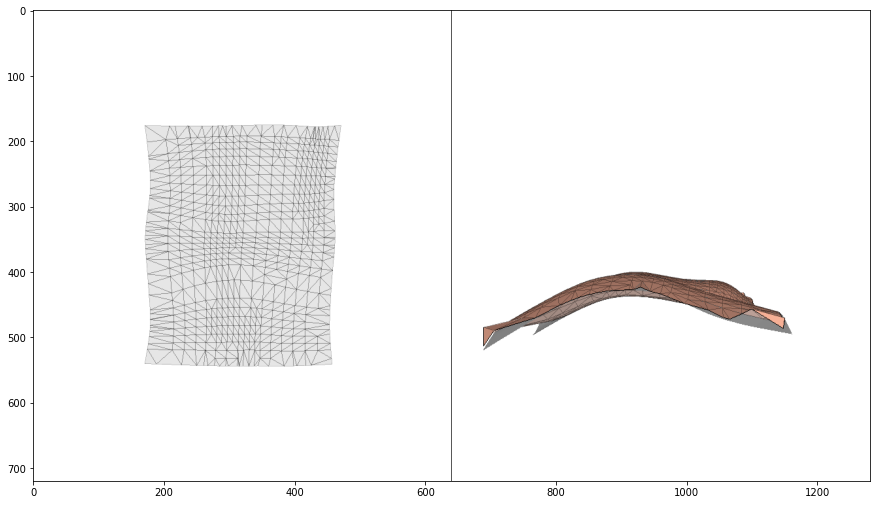

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (15,15)

fig = plt.figure()

ims = []
for i in range(len(frames)):
    im = plt.imshow(frames[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

rc('animation', html='jshtml')
ani

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('diffdrape.mp4')

In [ ]:
param_v.grad

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 5.2515e-01,  1.0714e+00,  1.2792e+00],
         [-1.1614e-01, -1.9400e+01,  2.4606e+00],
         [-1.6594e+00, -5.3408e-02, -3.1655e-01],
         [-4.9235e-01,  1.6270e+00,  7.3980e-01]],

        [[ 3.6716e-01,  7.7876e-01,  1.2287e+00],
         [ 1.3885e+00,  7.0688e-01, -8.0009e-01],
         [-2.0023e+00, -1.0316e+00, -2.2582e-01],
         [-1.5427e-01,  1.2737e+00,  4.1912e-01]],

        [[ 1.0940e-01,  2.2742e+00,  1.5669e+00],
         [ 1.2346e+00, -1.0208e-01, -9.9001e-01],
         [-1.7325e+00, -1.5871e+00, -1.8106e-01],
         [-1.8804e-01,  1.7514e+00,  1.1129e+00]],

        [[ 1.8374e-01,  8.0553e-01,  1.3801e+00],
         [ 4.9281e-01,  9.8613e-01,  1.2120e+00],
         [-1.8511e+00, -1.7369e+00, -2.0055e-01],
         [-1.8168e-01,  9.4347e-01,  6.932

In [ ]:
torch.save(param_v, 'trajectory.pt')

In [ ]:
trajectories - param_v.detach().numpy()

array([[[-0.01922032, -0.00095507,  0.19310345],
        [-0.01856927,  0.00422383,  0.20959825],
        [ 0.01909479,  0.00531125,  0.19310345],
        [ 0.00986824, -0.00195834,  0.17410683]],

       [[-0.01970839, -0.00141922,  0.19267362],
        [ 0.00109425,  0.00376862,  0.20914015],
        [ 0.01953336,  0.00575257,  0.19354344],
        [ 0.01040645, -0.00131477,  0.17268107]],

       [[-0.01966592, -0.00139915,  0.2128895 ],
        [ 0.00113655,  0.00376157,  0.2091339 ],
        [-0.00047054, -0.01426964,  0.17353911],
        [ 0.00766116, -0.02478876,  0.17337495]],

       [[-0.01880925, -0.0005201 ,  0.19353445],
        [ 0.00100545,  0.00377859,  0.20881452],
        [ 0.01953316, -0.01427315,  0.17354007],
        [-0.01298765, -0.02418677,  0.17360671]],

       [[ 0.0003531 ,  0.01860482,  0.17352728],
        [ 0.00098938,  0.0237985 ,  0.22916953],
        [ 0.03865633,  0.00576176,  0.19354185],
        [ 0.00941129, -0.00151651,  0.15433597]],

       [[ 

In [ ]:
import trimesh
import trimesh.transformations as tf
import numpy as np

curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.3])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [39, 297, 239, 581]
steps = 30

for i in range(len(handles)):

    original_path = trimesh.load_path(np.cumsum(trajectories[:,i,:],axis=0) + + flat_mesh.vertices[handles[i]])
    optimized_path = trimesh.load_path(np.cumsum(param_v.detach().numpy()[:,i,:]*0.125,axis=0) + flat_mesh.vertices[handles[i]])
    scene.add_geometry(original_path)
    scene.add_geometry(optimized_path)

scene.show()